In [1]:
import os
import json
import pandas as pd

# 处理 CLUE 的数据集

In [5]:
train_file  = r"..\clue_data\tnews_public\train.json"
dev_file  = r"..\clue_data\tnews_public\dev.json"
test_file = r"..\clue_data\tnews_public\test.json"
label_file  = r"..\clue_data\tnews_public\labels.json"

In [8]:
train_list = []
dev_list = []
label_list = []
with open(train_file, "r", encoding="utf-8") as f:
    for line in f:
        train_list.append(json.loads(line))
with open(dev_file, "r", encoding="utf-8") as f:
    for line in f:
        dev_list.append(json.loads(line))
with open(label_file, "r", encoding="utf-8") as f:
    for line in f:
        label_list.append(json.loads(line))

print("train: ", len(train_list))
print("dev: ", len(dev_list))
print("label: ", len(label_list))

train:  53360
dev:  10000
label:  15


In [9]:
# 重新写入文件, 目录都是 ../data 目录下
label_dict = {}
for i in range(len(label_list)):
    label_item = label_list[i]
    label_desc = label_item["label_desc"]
    label_item["label_id"] = i
    label_dict[label_desc] = label_item
with open("../data/label.json", "w", encoding="utf-8") as f:
    json.dump(label_dict, f, ensure_ascii=False, indent=2)

In [10]:
with open("../data/train.csv", "w", encoding="utf-8") as f:
    for item in train_list:
        f.write(f"{item['label_desc']}\t{item['sentence']}\n")
with open("../data/dev.csv", "w", encoding="utf-8") as f:
    for item in dev_list:
        f.write(f"{item['label_desc']}\t{item['sentence']}\n")

# 简单分析下数据

In [11]:
df_train = pd.read_csv("../data/train.csv", header=None, index_col=None, names=["label", "title"], sep="\t")
df_dev = pd.read_csv("../data/dev.csv", header=None, index_col=None, names=["label", "title"], sep="\t")

In [12]:
df_train["len"] = df_train["title"].apply(lambda x: len(x))
df_dev["len"] = df_dev["title"].apply(lambda x: len(x))

<AxesSubplot:>

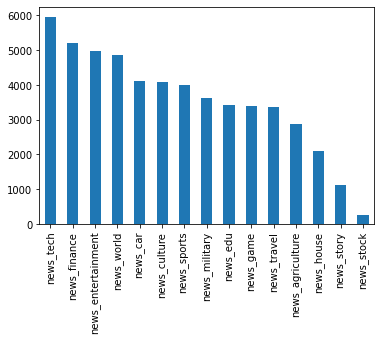

In [13]:
df_train["label"].value_counts().plot(kind="bar")

<AxesSubplot:>

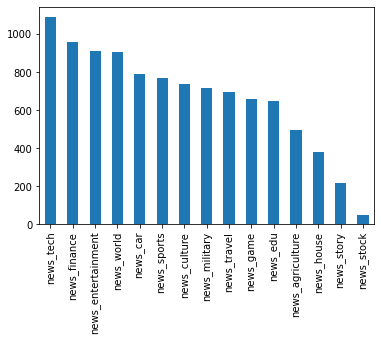

In [14]:
df_dev["label"].value_counts().plot(kind="bar")

In [15]:
df_train["len"].describe()

count    53360.000000
mean        22.130941
std          7.309748
min          2.000000
25%         17.000000
50%         22.000000
75%         28.000000
max        145.000000
Name: len, dtype: float64

In [19]:
print(df_train["len"].quantile(0.99))
print(df_dev["len"].quantile(0.999))

39.0
48.001000000000204
